In [146]:
import nltk
import urllib
import bs4 as bs
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
# Gettings the data source
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Geography').read()
source

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Geography - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"53b8a170-2f0d-42e3-80a2-300da6f8674a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Geography","wgTitle":"Geography","wgCurRevisionId":1030684909,"wgRevisionId":1030684909,"wgArticleId":18963910,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Russian-language sources (ru)","Articles with short description","Short description is different from Wikidata","Wikipedia pages semi-protected against vandalism","Wik

In [148]:
# Parsing the data/ creating BeautifulSoup object
soup = bs.BeautifulSoup(source,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Geography - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"53b8a170-2f0d-42e3-80a2-300da6f8674a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Geography","wgTitle":"Geography","wgCurRevisionId":1030684909,"wgRevisionId":1030684909,"wgArticleId":18963910,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Russian-language sources (ru)","Articles with short description","Short description is different from Wikidata","Wikipedia pages semi-protected against vandalism","Wikipedia 

In [149]:
# Fetching the data
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [150]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [151]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

[' theoretical approaches methods methods and techniques geography (from greek: γεωγραφία, geographia, literally "earth description") is a field of science devoted to the study of the lands, features, inhabitants, and phenomena of the earth and planets.',
 'the first person to use the word γεωγραφία was eratosthenes ( – bc).',
 'geography is an all-encompassing discipline that seeks an understanding of earth and its human and natural complexities—not merely where objects are, but also how they have changed and come to be.',
 'geography is often defined in terms of two branches: human geography and physical geography.',
 'human geography is concerned with the study of people and their communities, cultures, economies, and interactions with the environment by studying their relations with and across space and place.',
 'physical geography is concerned with the study of processes and patterns in the natural environment like the atmosphere, hydrosphere, biosphere, and geosphere.',
 'the fo

In [152]:
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
sentences

[['theoretical',
  'approaches',
  'methods',
  'methods',
  'and',
  'techniques',
  'geography',
  '(',
  'from',
  'greek',
  ':',
  'γεωγραφία',
  ',',
  'geographia',
  ',',
  'literally',
  '``',
  'earth',
  'description',
  "''",
  ')',
  'is',
  'a',
  'field',
  'of',
  'science',
  'devoted',
  'to',
  'the',
  'study',
  'of',
  'the',
  'lands',
  ',',
  'features',
  ',',
  'inhabitants',
  ',',
  'and',
  'phenomena',
  'of',
  'the',
  'earth',
  'and',
  'planets',
  '.'],
 ['the',
  'first',
  'person',
  'to',
  'use',
  'the',
  'word',
  'γεωγραφία',
  'was',
  'eratosthenes',
  '(',
  '–',
  'bc',
  ')',
  '.'],
 ['geography',
  'is',
  'an',
  'all-encompassing',
  'discipline',
  'that',
  'seeks',
  'an',
  'understanding',
  'of',
  'earth',
  'and',
  'its',
  'human',
  'and',
  'natural',
  'complexities—not',
  'merely',
  'where',
  'objects',
  'are',
  ',',
  'but',
  'also',
  'how',
  'they',
  'have',
  'changed',
  'and',
  'come',
  'to',
  'be',
 

In [153]:
sentence=str(text)
import io
with io.open("Geography.txt", "w", encoding="utf-8") as f:
    f.write(text)
    f.flush()
    f.close()
sentence

' theoretical approaches methods methods and techniques geography (from greek: γεωγραφία, geographia, literally "earth description") is a field of science devoted to the study of the lands, features, inhabitants, and phenomena of the earth and planets. the first person to use the word γεωγραφία was eratosthenes ( – bc). geography is an all-encompassing discipline that seeks an understanding of earth and its human and natural complexities—not merely where objects are, but also how they have changed and come to be. geography is often defined in terms of two branches: human geography and physical geography. human geography is concerned with the study of people and their communities, cultures, economies, and interactions with the environment by studying their relations with and across space and place. physical geography is concerned with the study of processes and patterns in the natural environment like the atmosphere, hydrosphere, biosphere, and geosphere. the four historical traditions 

In [154]:
import pandas as pd
df = pd.read_csv('Geography.txt', header=None, names=["text"])
df

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,text
theoretical approaches methods methods and techniques geography (from greek: γεωγραφία,geographia,"literally ""earth description"") is a field of science devoted to the study of the lands",features,inhabitants,and phenomena of the earth and planets. the first person to use the word γεωγραφία was eratosthenes ( – bc). geography is an all-encompassing discipline that seeks an understanding of earth and its human and natural complexities—not merely where objects are,but also how they have changed and come to be. geography is often defined in terms of two branches: human geography and physical geography. human geography is concerned with the study of people and their communities,cultures,economies,and interactions with the environment by studying their relations with and across space and place. physical geography is concerned with the study of processes and patterns in the natural environment like the atmosphere,hydrosphere,biosphere,and geosphere. the four historical traditions in geographical research are spatial analyses of natural and the human phenomena,area studies of places and regions,studies of human-land relationships,"and the earth sciences. geography has been called ""the world discipline"" and ""the bridge between the human and the physical sciences"". geography is a systematic study of the universe and its features. traditionally",geography has been associated with cartography and place names. although many geographers are trained in toponymy and cartology,this is not their main preoccupation. geographers study the space and the temporal database distribution of phenomena,processes,and features as well as the interaction of humans and their environment. because space and place affect a variety of topics,such as economics,health,climate,plants and animals,geography is highly interdisciplinary. the interdisciplinary nature of the geographical approach depends on an attentiveness to the relationship between physical and human phenomena and its spatial patterns. names of places...are not geography...to know by heart a whole gazetteer full of them would not,in itself,constitute anyone a geographer. geography has higher aims than this: it seeks to classify phenomena (alike of the natural and of the political world,in so far as it treats of the latter),to compare,to generalize,to ascend from effects to causes,and,in doing so,to trace out the laws of nature and to mark their influences upon man. this is 'a description of the world'—that is geography. in a word geography is a science—a thing not of mere names but of argument and reason,of cause and effect. just as all phenomena exist in time and thus have a history,they also exist in space and have a geography. geography as a discipline can be split broadly into two main subsidiary fields: human geography and physical geography. the former largely focuses on the built environment and how humans create,view,manage,and influence space. the latter examines the natural environment,and how organisms,climate,soil,water,and landforms produce and interact. the difference between these approaches led to a third field,environmental geography,which combines physical and human geography and concerns the interactions between the environment and humans. physical geography (or physiography) focuses on geography as an earth science. it aims to understand the physical problems and the issues of lithosphere,hydrosphere,atmosphere,pedosphere,and global flora and fauna patterns (biosphere). physical geography is the study of earth's seasons,climate,atmosphere,soil,streams,landforms,and oceans. biogeography climatology & meteorology coastal geography environmental management geodesy geomorphology glaciology hydrology & hydrography landscape ecology oceanography pedology palaeogeography quaternary sc

# Word Cloud

In [156]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

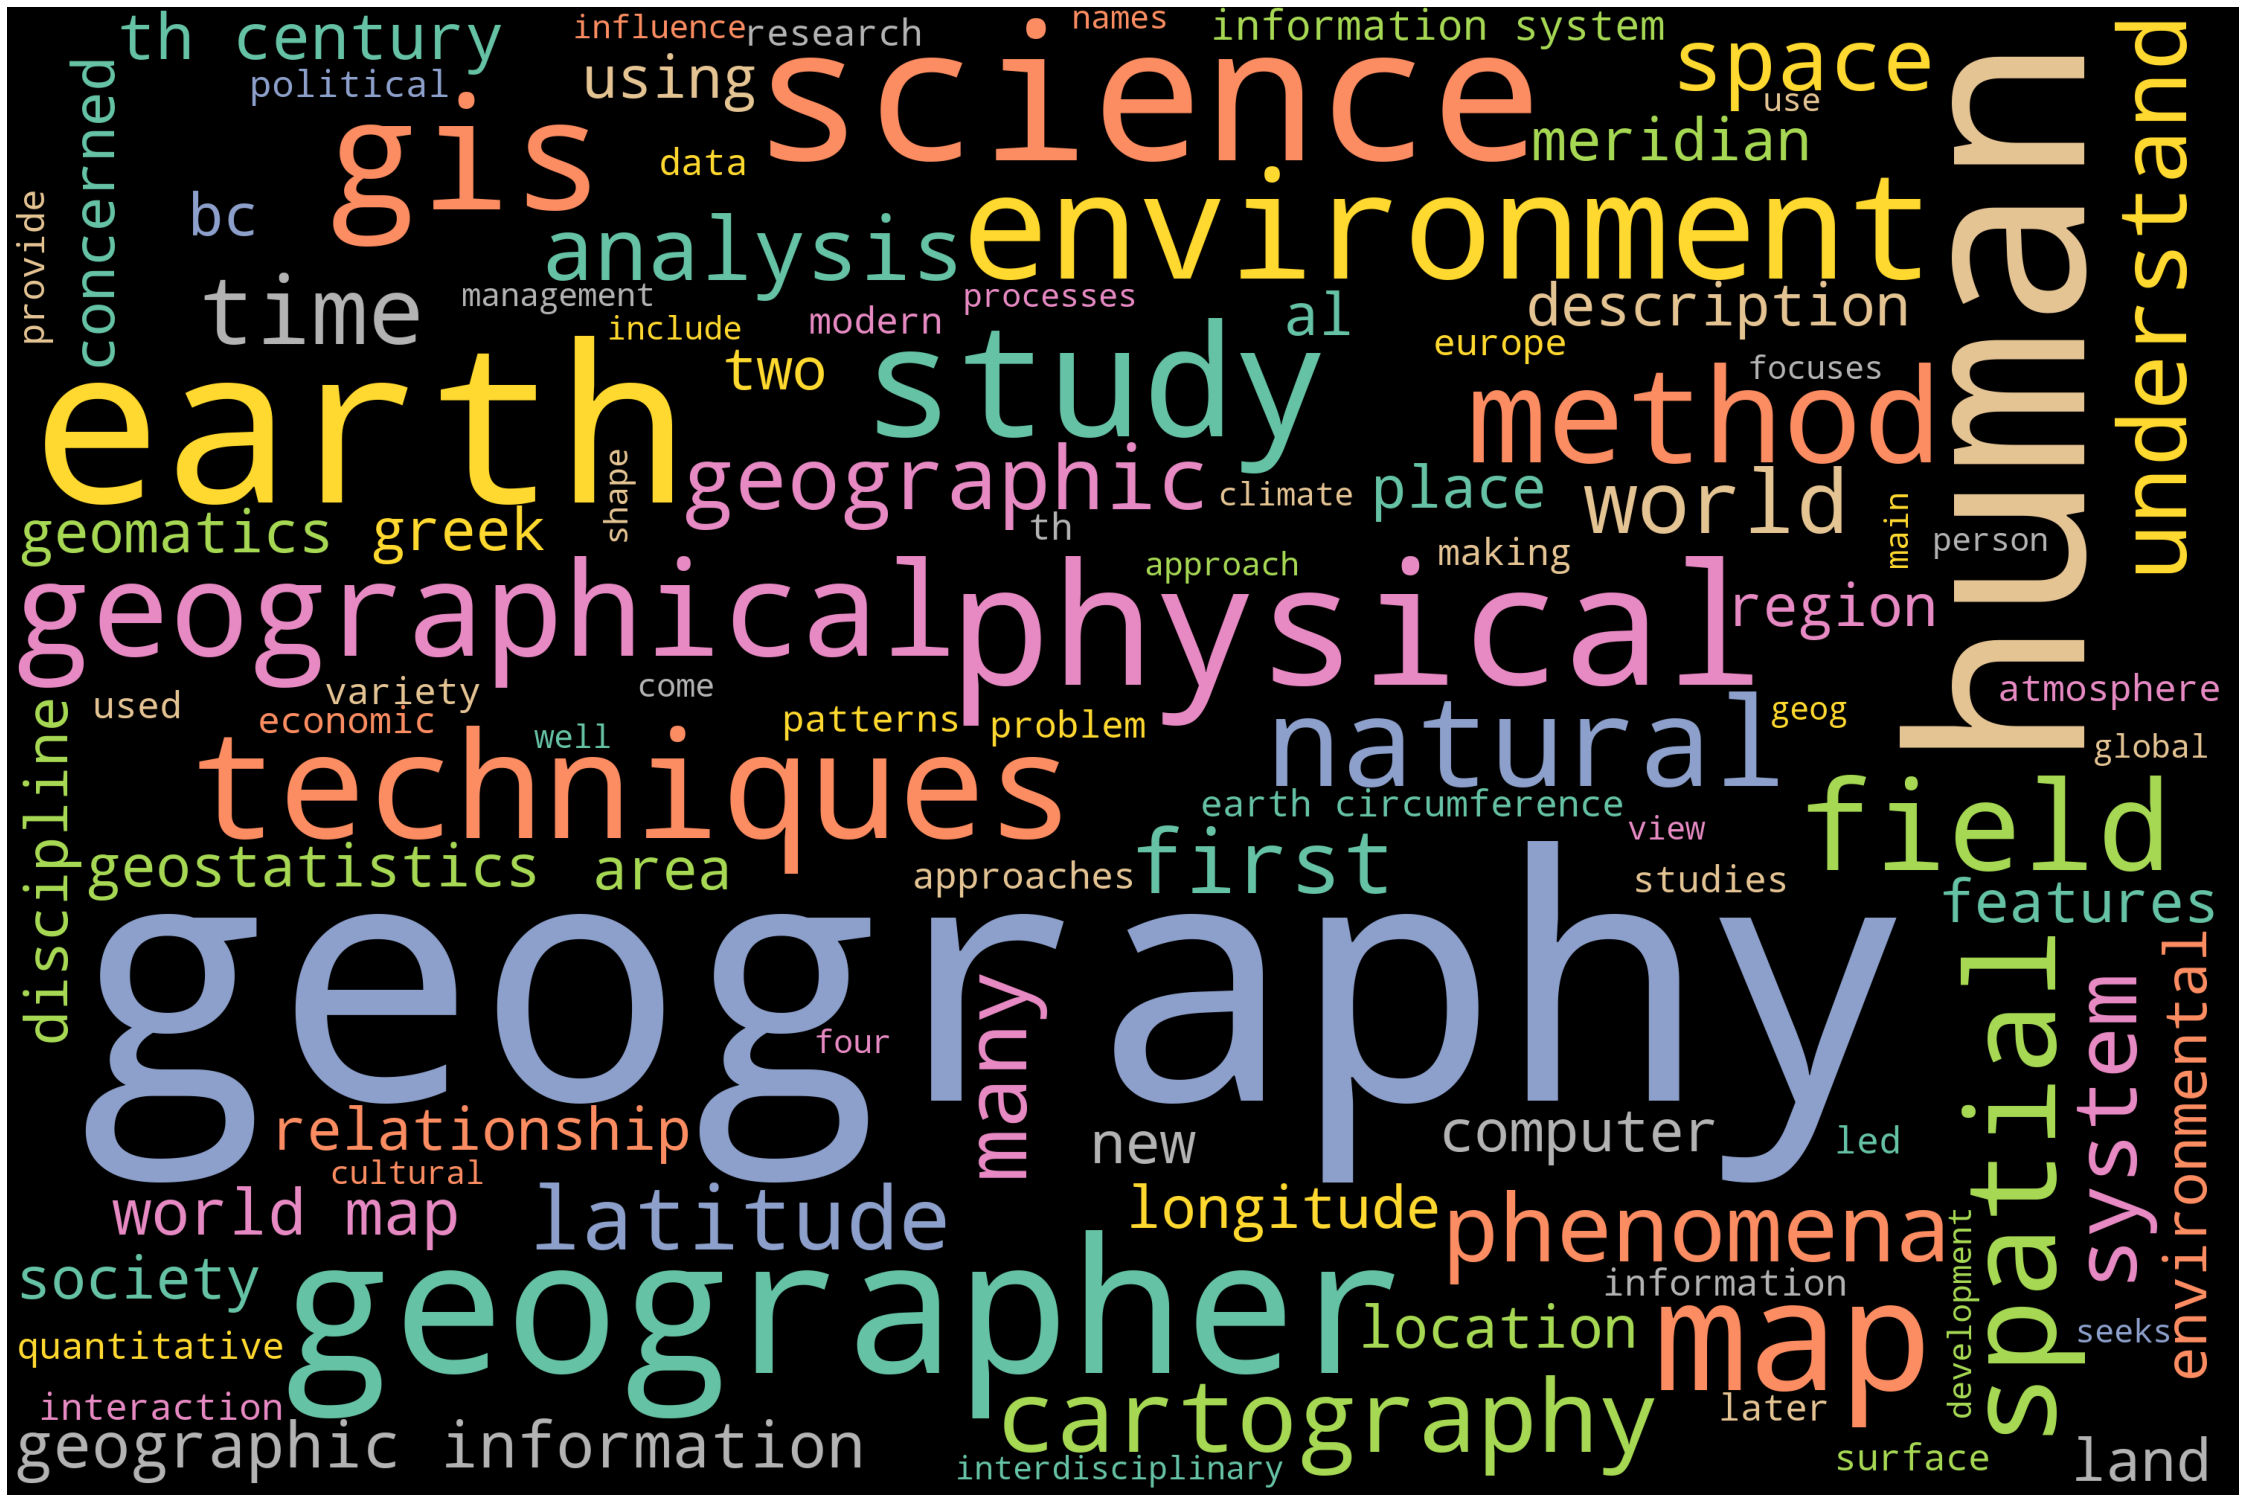

In [157]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)